<a href="https://colab.research.google.com/github/rajibbanerjee/deeplearning/blob/master/Copy_of_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs


# Sigmoid Neuron

$__init__(self) $
_______________________________________
is the constructor of the class and the piece of code inside will be called when we create the object of this class

$perceptron(self, x) & sigmoid(self, x)$
_______________________________________
Perceptron does the aggregation 


$\Sigma w_ix_i + b $


Sigmoid $\frac{1}{1+e^{-wx + b}}$   adds the nonlinearity 

Perceptron and Sigmoid together do the forward pass

grad_w(self, x, y)$

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred -y) * y_pred * (1 - y_pred) * x
  
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred -y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True):
    #initialize w, b
    if(initialize):
      self.w = np.array([-1.79752412,-1.20884101])
      self.b = -0.0033718
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
        
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

# Fitting for Simple Data

$[(2.5, 2.5), (4, -1), (1, -4), (3, 1.25), (2, 4), (1, 5)]$

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

# Plotting the Input
Red are of Y = 0
Green are of Y = 1

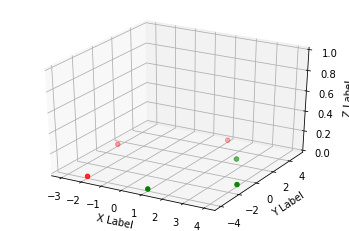

In [0]:
Xo = np.asarray([[2.5, 2.5, 0], [4, -1, 0], [1, -4, 0], [-3, 1.25, 0], [-2, -4, 0], [1, 5, 0]])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.scatter(Xo[:,0], Xo[:,1],Xo[:,2],  c=Y, cmap=cmap)
ax.scatter(X[:,0], X[:,1],0,  c=Y, cmap=cmap)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_zlim(0,1)
plt.show()



To develop the intution, this data has been created as a 2D data, so that we can plot. Also the intention is to show how a simple sigmoid neuron can adjust its parameters to find out the approximate decession boundary.

$X = (x_1, x_2)$  can be thought as two features of the objects that we are classifing. The code can be easily extended for $n$ features

In [0]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

In [0]:

def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.4)
  ax.scatter(X[:,0], X[:,1], c=Y, cmap=cmap)
  ax.plot()
  
  
  
def plot_3dsn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.plot_surface(XX1, XX2, YY, cmap=cmap, alpha=0.4)
  ax.scatter(X[:,0], X[:,1], c=Y, cmap=cmap)
 
  

# Plotting the 3D Sigmoid, to visualize how the learning is happening

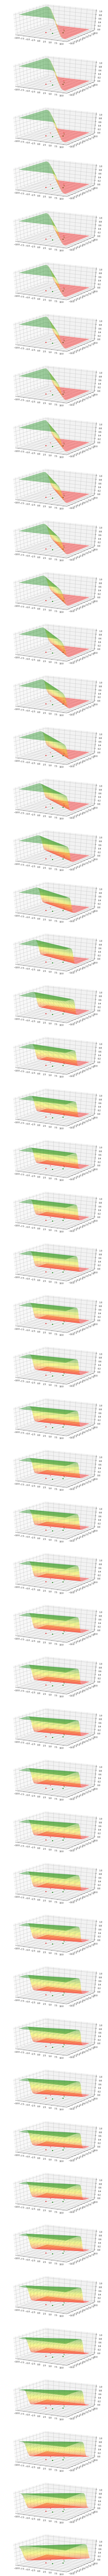

In [0]:

sn.fit(X, Y, 1, 0.25, True)
N = 50
fig = plt.figure(figsize = (10, N*5) )
for i in range(N):
  #print(sn.w, sn.b)
  ax = fig.add_subplot(N, 1, i+1, projection='3d')
  plot_3dsn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.25, False)
  

# Plotting the contours

[-1.76144272 -1.2251552 ] -0.010684716075168202


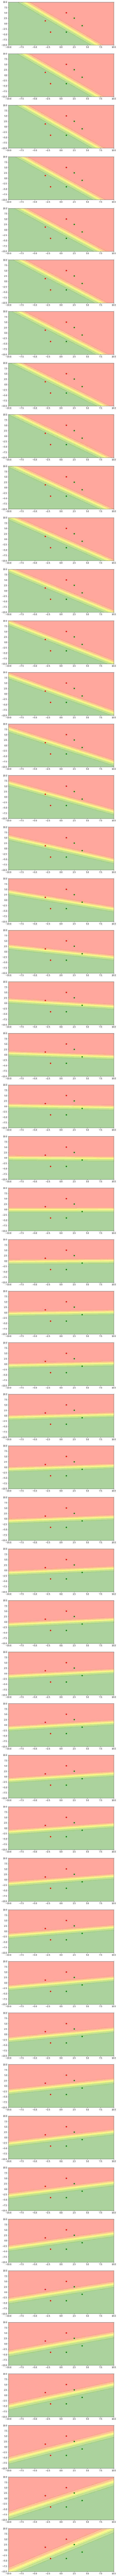

In [0]:
sn.fit(X, Y, 1, 0.50, True)
print(sn.w, sn.b)
N = 50
plt.figure(figsize = (10, N*5) )
for i in range(N):
  ax = plt.subplot(N, 1, i+1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.25, False)


# Animated Visualization

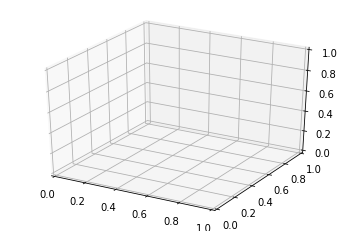

In [0]:
N = 300
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)
XX1, XX2 = np.meshgrid(X1, X2)
YY = np.zeros((XX1.shape[0], XX1.shape[1], N))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


def update_plot(frame_number, YY, plot):
  plot[0].remove()
  plot[0] = ax.plot_surface(XX1, XX2, YY[:,:,frame_number], cmap=cmap)
  ax.scatter(X[:,0], X[:,1], c=Y, cmap=cmap)


sn.fit(X, Y, 1, 0.50, True)
for k in range(N):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j, k] = sn.sigmoid(sn.perceptron(val))

  sn.fit(X, Y, 1, 0.15, False)






In [0]:
plot = [ax.plot_surface(XX1, XX2, YY[:,:,0], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(0,1.5)
animate = animation.FuncAnimation(fig, update_plot, N, fargs=(YY, plot), interval=50)
#plt.show()

HTML(animate.to_html5_video())